In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
sys.path
import data_loader as dl

In [2]:
#read in the megaScript and reformat it
def clean_meagScript(file):
    df = pd.read_csv(file, low_memory=False,  header=[0,1])
    df.drop(columns = {"Unnamed: 0_level_0"})
    return df

Slicing out the Peptide Prophet Probability values for MsFragger. There is no qvalue or PEP, so this is the row we are using. 
Counting how many are at or under the cutoff

In [3]:
def get_msf_prob_len(df, cutoff):
    msf_before = df["MsFragger"]['Updated_probability']
    msf_before =  msf_before.dropna()
    before_under_cutoff = len(msf_before.loc[msf_before <= cutoff])
    
    msf_after = df["MsFragger"]['mokapot q-value']
    msf_after =  msf_after.dropna()
    after_under_cutoff = len(msf_after.loc[msf_after <= cutoff])
    
    return (after_under_cutoff - before_under_cutoff)/before_under_cutoff

Slicing out the qvalues from MetaMorpheus Counting how many are at or under the cutoff

In [4]:
def get_mm_Qval_len(df, cutoff):
    mm_before = df["MetaMorpheus"]["QValue"] 
    mm_before =  mm_before.dropna() 
    before_under_cutoff = len(mm_before.loc[mm_before <= cutoff])
    
    mm_after = df["MetaMorpheus"]['mokapot q-value'] 
    mm_after =  mm_after.dropna() 
    after_under_cutoff = len(mm_after.loc[mm_after <= cutoff])
    
    
    return (after_under_cutoff - before_under_cutoff)/before_under_cutoff

Slicing out the qvalues from MsgfPlus and counting how many are at or under the cutoff

In [5]:
def get_msg_Qval_len(df, cutoff):
    msg_before = df["MsgfPlus"]["QValue"] 
    msg_before =  msg_before.dropna() 
    before_under_cutoff = len(msg_before.loc[msg_before <= cutoff])
    
    msg_after = df["MsgfPlus"]['mokapot q-value'] 
    msg_after =  msg_after.dropna() 
    after_under_cutoff = len(msg_after.loc[msg_after <= cutoff])
    
    return (after_under_cutoff - before_under_cutoff)/before_under_cutoff

Slicing out the PEP from MaxQuant. Counting how many are at or under the cutoff

In [14]:
def get_mq_PEP_len(df, cutoff):
    print("MQ:")
    mq_before = df["MaxQuant"]["PEP"] 
    mq_before =  mq_before.dropna() 
    before_under_cutoff = len(mq_before.loc[mq_before <= cutoff])
    print("val before is: " + str(before_under_cutoff))
    
    
    mq_after = df["MaxQuant"]['mokapot q-value'] 
    mq_after =  mq_after.dropna() 
    after_under_cutoff = len(mq_after.loc[mq_after <= cutoff])
    print("val after is: " + str(after_under_cutoff))
    
    return (after_under_cutoff - before_under_cutoff)/before_under_cutoff

This function gets the number of scan values that were at or below the cutoff for each tool and returns them.

In [20]:
def get_file_values(file, cutoff):
    df = clean_meagScript(file)
    msf = get_msf_prob_len(df, cutoff)
    MM_QVal = get_mm_Qval_len(df, cutoff)
    msg_QVal = get_msg_Qval_len(df, cutoff)
    MQ_PEP = get_mq_PEP_len(df, cutoff)
    values_list = {"msf" : msf, "MM_QVal" : MM_QVal, "msg_QVal" : msg_QVal, "MQ_PEP" : MQ_PEP}
    return values_list

In [25]:
def get_avg(group):
    
    total = 0
    for val in group:
        total += val


    increase = total/(len(group))
    return increase

Reading in the data and making the graph for the 2ng data at a certain cutoff

MQ:
val before is: 7900
val after is: 11720
MQ:
val before is: 8210
val after is: 11101
MQ:
val before is: 6067
val after is: 9407
MQ:
val before is: 6401
val after is: 9052
MQ:
val before is: 11196
val after is: 14040
MQ:
val before is: 10361
val after is: 13151


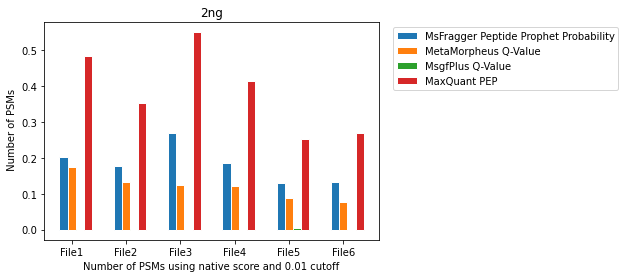

In [22]:
File1 = get_file_values("MokaPot/MegaScript_2ng_rep1.csv", 0.01)
File2 = get_file_values("MokaPot/MegaScript_2ng_rep2.csv", 0.01)
File3 = get_file_values("MokaPot/MegaScript_2ng_rep3.csv", 0.01)
File4 = get_file_values("MokaPot/MegaScript_2ng_rep4.csv", 0.01)
File5 = get_file_values("MokaPot/MegaScript_2ng_rep5.csv", 0.01)
File6 = get_file_values("MokaPot/MegaScript_2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_prob = [File1['msf'], File2['msf'], File3['msf'], File4['msf'], File5['msf'], File6['msf']]
MM_qval = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
mq_PEP = [File1['MQ_PEP'], File2['MQ_PEP'], File3['MQ_PEP'], File4['MQ_PEP'], File5['MQ_PEP'], File6['MQ_PEP']]


# Set position of bar on X axis
r1 = np.arange(len(msf_prob))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
plt.bar(r1, msf_prob, width=barWidth, edgecolor='white', label='MsFragger Peptide Prophet Probability')
plt.bar(r2, MM_qval, width=barWidth, edgecolor='white', label='MetaMorpheus Q-Value')
plt.bar(r3, msg_qval, width=barWidth, edgecolor='white', label='MsgfPlus Q-Value')
plt.bar(r4, mq_PEP, width=barWidth, edgecolor='white', label='MaxQuant PEP')
 
# Add xticks on the middle of the group bars
plt.ylabel(' Number of PSMs')
plt.xlabel('Number of PSMs using native score and 0.01 cutoff')
plt.title('2ng')
plt.xticks([r + barWidth for r in range(len(msf_prob))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.73, 1))
figure1_1 = plt.gcf()
#figure1_1.savefig('2ng_PSM_native_score.png', dpi=300, bbox_inches='tight')
plt.show()


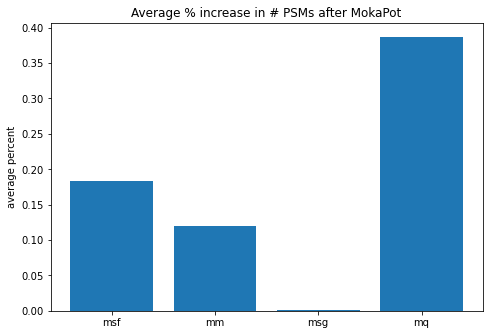

In [34]:
#getting the average % increase of PSMs after MokaPot
msf_avg = get_avg(msf_prob)
mm_avg = get_avg(MM_qval)
msg_avg = get_avg(msg_qval)
mq_avg = get_avg(mq_PEP)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
increases = [msf_avg, mm_avg, msg_avg, mq_avg]
tools = ['msf', 'mm', 'msg', 'mq']
ax.bar(tools, increases)
plt.ylabel('average percent')
#plt.xlabel('Number of PSMs using native score and 0.01 cutoff')
plt.title('Average % increase in # PSMs after MokaPot')
plt.show()

In [16]:
for val in msg_qval:
    print(val)

0.00243656528314569
0.0022220323049312023
-0.0010427528675703858
-0.00010613457864572278
0.0030131034966014996
7.467702188036741e-05


In [90]:
def total_avg(group):

    total = 0
    for val in group:
       # print(val)
        total += val

    return str(total)

In [91]:
msf_total = total_avg(msf_prob)
MM_total = total_avg(MM_qval)
msg_total = total_avg(msg_qval)
mq_total = total_avg(mq_PEP)

total = float(msf_total) + float(MM_total) + float(msf_total) + float(mq_total)
total_avg = total/(len(msf_prob) + len(MM_qval) + len(msg_qval) + len(mq_PEP))
print(total_avg)

0.21839245408360664
